# Análisis de los datos

Este documento tiene cómo objetivo analizar el conjunto de datos extraído de la web https://www.peaceagreements.org/search dónde se recogen acuerdos de paz desde 1990 hasta el día de hoy. Los conjuntos de datos tienen una gran cantidad de metadatos. Este conjunto de datos es utilizado en la PEC2 de Visualización de Datos del máster de ciencia de datos.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('pax_data_1868_agreements_09-11-20.csv')
df.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,1,1
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,...,0,0,0,0,1,1,0,0,0,1
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,1,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,...,0,0,0,1,0,0,0,0,1,1
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,1,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,1


Veamos las dimensiones del conjunto de datos.

In [4]:
df.shape

(1868, 266)

El conjunto de datos contiene 266 atributos o metadatos para cada acuerdo de paz firmado. Debdio a la gran dimensionalidad no se va a entrar en el detalle del análisis de su significado. Se realizará la explicación de los datos cuando sea necesario analizar alguna variable. Si desea encontar más información acerca de los atributos consulte el siguiente [codebook](https://www.peaceagreements.org/files/PA-X%20codebook%20Version4.pdf).

Voy a describir los datos para analizar que tipos de variables disponemos.

In [5]:
df.describe()

,PP,AgtId,Ver,Lgt,N_characters,Loc1GWNO,Loc2GWNO,UcdpAgr,PamAgr,CowWar,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1857.000000,246.000000,2.970000e+02,33.000000,1115.000000,...,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.0
mean,84.870450,1155.105996,1.249465,6.274625,11951.505353,528.693592,439.719512,2.903701e+10,17.272727,759.324664,...,0.177195,0.011242,0.102248,0.300321,0.193790,0.238758,0.009636,0.291756,0.383833,1.0
std,42.273883,663.722169,0.590838,17.194469,37644.455332,223.469441,195.075032,3.602522e+11,10.022702,254.762977,...,0.553679,0.105459,0.303056,0.608157,0.395372,0.426439,0.097715,0.454692,0.486448,0.0
min,1.000000,1.000000,1.000000,1.000000,329.000000,41.000000,2.000000,2.400000e+01,1.000000,139.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,55.000000,568.750000,1.000000,1.000000,2397.250000,365.000000,346.250000,1.107000e+03,9.000000,817.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90.000000,1135.500000,1.000000,2.000000,4354.000000,531.000000,371.000000,1.334000e+03,17.000000,857.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,123.000000,1736.250000,1.000000,5.000000,9420.500000,678.000000,625.000000,1.523000e+03,26.000000,905.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
max,160.000000,2317.000000,4.000000,323.000000,908459.000000,940.000000,770.000000,5.171991e+12,34.000000,941.000000,...,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Voy a realizar le explicación de algunas variables que resultan interesantes para su estudio según el codebook citado anteriormente (para todas las variables dónde no se indica el tipo de variable se entiende que son texto):

 - Con: Es el país o jurisdicción dónde se ha generado el conflicto (no siempre coincidirá con el real).
 - Contp: Es el tipo de acuerdo y está categorizado cómo Goverment, Territory, Goverment/Territory, Inter-group o Other. 
 - PP_name: Nombre del proceso de paz.
 - PP: Código del proceso de paz.
 - Reg: Lista de regiones dónde el acuerdo tiene lugar.
 - AgtId: Identificador único del acuerdo.
 - Ver: Versión del PAX usado.
 - Agt: Nombre del acuerdo
 - Dat: Date Signed
 - Status: Estado del acuerdo, para más información visitar el codebook.
 - Lgt: Longitud del acuerdo (páginas) (entero)
 - N_characters: Número de carácteres en el acuerdo (entero)
 - Agtp: El tipo de conflicto.
 - Stage: Estado del conflicto en el cual se firma el contrato.
 - StageSub: Subcategoría de la variable Stage por si se necesita más granuralidad.
 - Part: Las partes firmantes del acuerdo copiado tal y cómo se muestra.
 - ThrdPart: Firmantes que se consideran terceras partes.
 - OthAgr: Si el acuerdo menciona otro acuerdos.
 - Loc1ISO: Código ISO de una de las dos principales localizaciones dónde se ha dado el conflicto.
 - Loc2ISO: Código ISO de una de las dos principales localizaciones dónde se ha dado el conflicto.
 - Loc1GWNO: Código Gleditsch-Ward.
 - Loc2GWNO: Código Gleditsch-Ward.
 - UcdpCon: Uppsala Conflict Data Program Conflict ID.
 - UcdpAgr: Uppsala Conflict Data Program peace agreement ID.
 - PamAgr: Kroc Institute’s Peace Accords Matrix agreement ID.
 - CowWar: Correlates of War: War Number.

Todas las demás variables son dictonómicas y se analizarán dependiendo del interés de la investigación con los datos.



In [6]:
previous = df.memory_usage(deep=True)

In [7]:
# convertimos a categóricas todas las variables que son dictonómicas.
columns = ['Con', 'Contp',  'PPName', 'PP', 'Reg', 'AgtId', 'Ver', 'Agt', 'Dat',
           'Status', 'Lgt', 'N_characters', 'Agtp', 'Stage', 'StageSub', 'Part',
           'ThrdPart', 'OthAgr', 'Loc1ISO', 'Loc2ISO', 'Loc1GWNO', 'Loc2GWNO',
            'UcdpCon', 'UcdpAgr', 'PamAgr', 'CowWar']

mapping_type = {column: 'category' for column in df.columns if column not in columns}
mapping_type.update({'Lgt': 'int', 'N_characters': 'int'})
mapping_type.update({column: 'str' for column in columns if column not in mapping_type})

df = df.astype(mapping_type)
df.dtypes

Con         object
Contp       object
PP          object
PPName      object
Reg         object
            ...   
ImOth     category
ImRef     category
ImPK      category
ImE       category
ImSrc     category
Length: 266, dtype: object

Ahora todas las variables tienen sus tipos asignados y por lo tanto se mejora la eficiencia del uso del dataframe.

In [8]:
df.memory_usage(deep=True)/previous

Index     1.000000
Con       1.000000
Contp     1.000000
PP        7.414815
PPName    1.000000
            ...   
ImOth     0.131424
ImRef     0.131424
ImPK      0.131424
ImE       0.131424
ImSrc     0.130889
Length: 267, dtype: float64

A continuación, voy a intentar responder algunas preguntas para extraer información del conjunto de datos.


¿Cuáles son los 10 países dónde más conlfictos se han generado?

In [9]:
top_10_conflicts_countries = df['Con'].value_counts(sort=True).iloc[:10].index
for i, country in enumerate(top_10_conflicts_countries, 1):
    print(f'{i}. {country}')

1. Bosnia and Herzegovina/Yugoslavia (former)
2. Colombia
3. Philippines/Mindanao
4. Syria
5. Nepal
6. South Sudan
7. Yemen
8. South Sudan/Sudan
9. Croatia/Yugoslavia (former)
10. Central African Republic


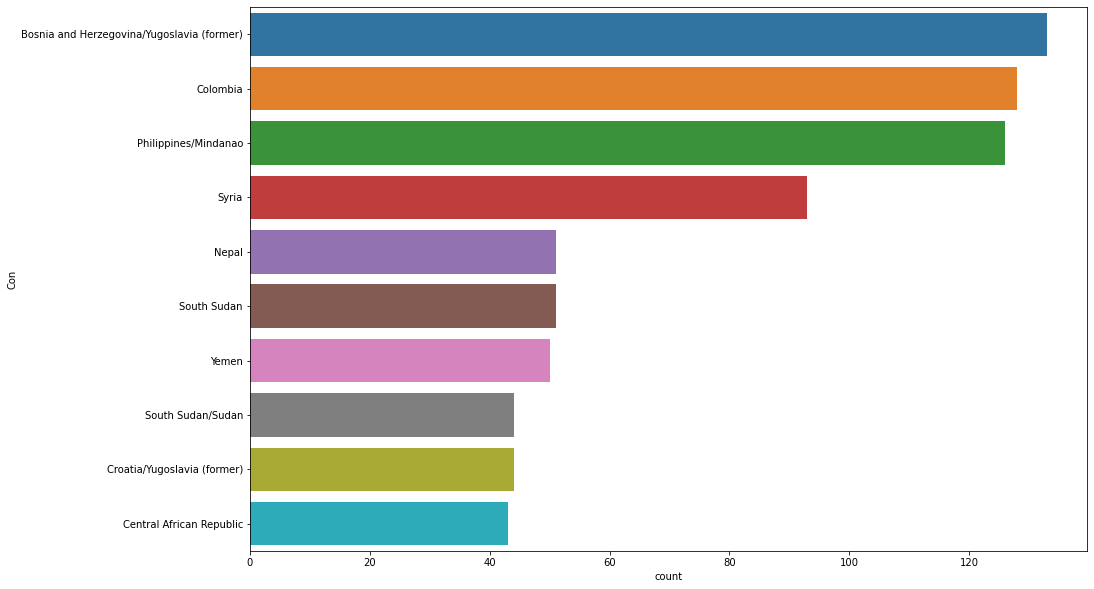

In [10]:
fig = plt.figure(figsize=(15, 10))

ax = sns.countplot(y=df['Con'].loc[df['Con'].isin(top_10_conflicts_countries)],
                 order=df['Con'].value_counts().index[:10], orient='h')

plt.show()

Vemos la variación del número de conflictos durante los años.

In [11]:
# Convertimos la variable Dat en tiempo
df['Dat'] = pd.to_datetime(df['Dat'])

# generamos una nueva columna que contenga el año
df['year'] = pd.DatetimeIndex(df['Dat']).year

df['year'].value_counts().describe()


# sns.displot(x=df['year'].value_counts(), kind="kde")

count    31.000000
mean     60.258065
std      19.834259
min       8.000000
25%      46.500000
50%      63.000000
75%      74.000000
max      93.000000
Name: year, dtype: float64

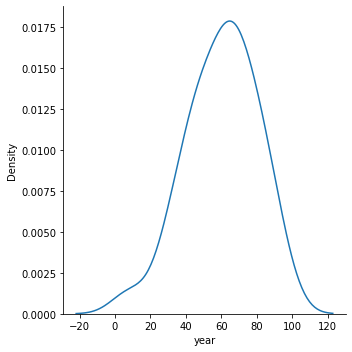

In [12]:
sns.displot(x=df['year'].value_counts(), kind="kde")

plt.show()

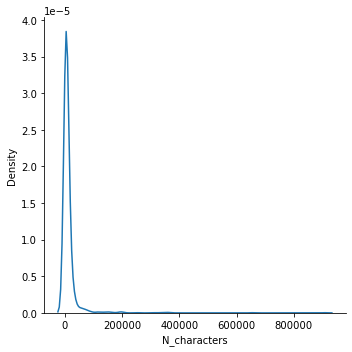

In [13]:
sns.displot(x=df['N_characters'], kind='kde')

Se prueba un test de normalidad sobre los datos.

In [14]:
from scipy import stats

k2, p = stats.normaltest(df['year'].value_counts())
alpha = .05

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


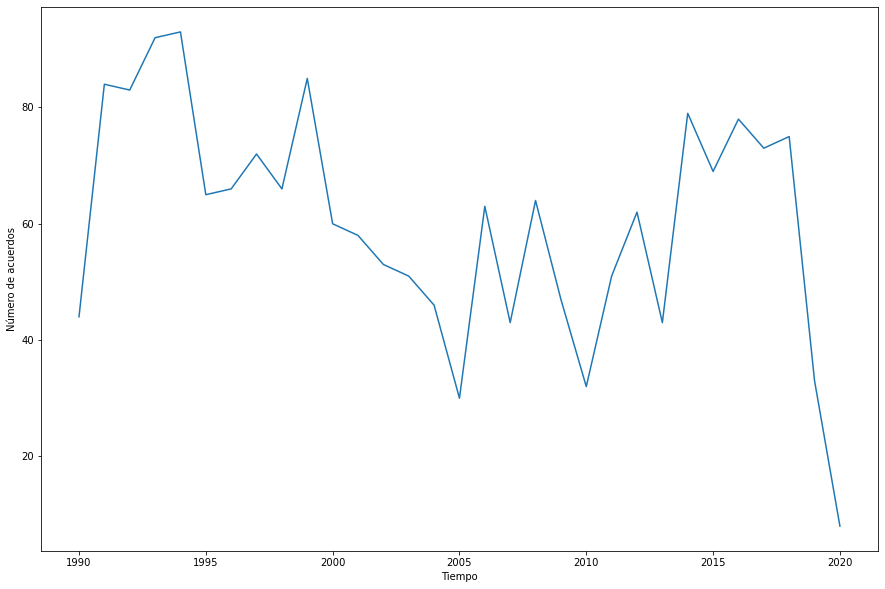

In [15]:
fig = plt.figure(figsize=(15, 10))

ax = sns.lineplot(x=np.sort(df['year'].unique()), y=df['year'].value_counts().sort_index())

ax.set_xlabel('Tiempo')
ax.set_ylabel('Número de acuerdos')

plt.show()

La base de datos recoge diferentes acuerdos de paz durante varios añosm vemos que todos los años se ha generado al menos un acuerdo y existen algunos años cuando se han generado más.

Otro dato de interés podría ser encontrar que tipos de conflictos son los más comunes.

In [16]:
my_iter = zip(df['Contp'].value_counts().index, round(df['Contp'].value_counts()/df.shape[0] * 100, 2))
for contp, row in my_iter:
    print(f'{contp}: {row} %')

Government/territory: 45.13 %
Government: 34.96 %
Inter-group: 13.97 %
Territory: 5.84 %
Other: 0.11 %


Desde mi punto de vista, un país mejora su calidad de vida junto a sus derechos socio-económicos y la igualdad de género. Por lo tanto, se va a analizar cuantos de estos acuerdos contienen en el estos derechos como puntos del acuerdo. 

Las preguntas que se van a responder son los siguientes? 

- ¿Cuántos acuerdos contienen derechos socio-económicos? 
- ¿Cómo se distribuyen los diferentes tipos en los datos?
- ¿Cuántos acuerdos contienen referencias a género?
- ¿Qué tipo de acuerdos en referencia en al género?

Para responder a estas preguntas se aplicarán las siguientes variables del conjunto de datos.

- HrSec: Derechos socio-económicos, es una variable dictonómica dónde toma los valores 0 ó 1, dónde 0 representa si no se nombran este tipo de derechos en los acuerdos y 1 lo contrario.

En el caso que la variable `HrSec` sea 1 existen otras subvariables que nos indican el tipo de derechos socio-económicos que nombra dicho acuerdo. Las variables son las siguientes y de la misma forma toman valores entre 0 ó 1.

- SerProp: Propiedad
- SerWork: Trabajo
- SerHeal: Salud
- SerEdu: Educación
- SerStdl: Estandár de vida adecuado
- SerShel: Refugio/Vivienda
- SerSs: Seguridad Social
- SerCult: Vida cultural
- SerOth: Otros

En referencia al género, las variables son:

- GeWom: Si el valor de esta variable es 1, el acuerdo recoge alguna referencia a las mujeres, niñas y sus derechos. En caso contrario, 0.
- GeMe: Si el valor de esta variable es 1, el acuerdo recoge alguna referencia a los hombres o niños. En caso contrario, 0. Esta variable además se divide en las siguientes variables. 
    - GeMeNu: Reducción de la neutralidad de género. Esta variable toma el valor 1 en el caso que en el acuerdo exista alguna palaba referida ambos géneros cómo "mujeres y hombres", "niñas y niños", "hijas e hijos". De lo contrario, toma el valor 0.
    - GeMeOth: Otros. Toma el valor de 1 si incluye disposiciones relacionadas con los hombres que van más allá del lenguaje neutral en cuanto al género. De lo contrario, toma valor 0.
- GeLgbti: Toma el valor 1 si el acuerdo nombra algo positivo sobre el colectivo LGTBI. Si no nombra nada de este colectivo, toma el valor 0.
- GeLgbtiNeg: Toma el valor 1 si el acuerdo nombra algo positivo sobre el colectivo LGTBI. Si no nombra nada de este colectivo, toma el valor 0. 
- GeFa: Toma el valor 1 si el acuerdo nombra algún tipo de incidencia sobre específicos miembros de la familia. De lo contrario, toma el valor 0.


In [17]:
df['HrSec'].value_counts()

0    1721
1     147
Name: HrSec, dtype: int64

In [19]:
text_var = '''SerProp: Propiedad
SerWork: Trabajo
SerHeal: Salud
SerEdu: Educación
SerStdl: Estandár de vida adecuado
SerShel: Refugio/Vivienda
SerSs: Seguridad Social
SerCult: Vida cultural
SerOth: Otros'''
mapping = {column.split(':')[0]: column.split(':')[1] for column in text_var.splitlines()}
mapping = {
    'SerProp': ' Propiedad',
    'SerWork': ' Trabajo',
    'SerHeal': ' Salud',
    'SerEdu': ' Educación',
    'SerStdl': ' Estandár de vida adecuado',
    'SerShel': ' Refugio/Vivienda',
    'SerSs': ' Seguridad Social',
    'SerCult': ' Vida cultural',
    'SerOth': ' Otros'
}
columns = [v for v in mapping.values()]
print(mapping)

{'SerProp': ' Propiedad', 'SerWork': ' Trabajo', 'SerHeal': ' Salud', 'SerEdu': ' Educación', 'SerStdl': ' Estandár de vida adecuado', 'SerShel': ' Refugio/Vivienda', 'SerSs': ' Seguridad Social', 'SerCult': ' Vida cultural', 'SerOth': ' Otros'}


In [17]:
df_social_human_rights = df.loc[df['HrSec'] == 1]

df_social_human_rights.rename(columns=mapping, inplace=True)

df_social_human_rights_filtered = df_social_human_rights[columns]
df_social_human_rights_filtered.dtypes

 Propiedad                    category
 Trabajo                      category
 Salud                        category
 Educación                    category
 Estandár de vida adecuado    category
 Refugio/Vivienda             category
 Seguridad Social             category
 Vida cultural                category
 Otros                        category
dtype: object

In [18]:
df['HrSec'].value_counts()/df.shape[0] * 100

0    92.130621
1     7.869379
Name: HrSec, dtype: float64

A continuación, calculamos como se distriubye el tipo de acuerdos que mencionan algo sobre la seguridad social.

In [40]:
results = []
for column in columns:
    count = df_social_human_rights_filtered[column].loc[df_social_human_rights_filtered[column] == 1].shape[0]
    results.append((column, count))

for result in results:
    # print(result[1])
    print(f'{result[0].strip()}: {round(result[1]/df_social_human_rights_filtered.shape[0] * 100, 2)}')

Propiedad: 57.14
Trabajo: 34.01
Salud: 23.13
Educación: 34.69
Estandár de vida adecuado: 19.05
Refugio/Vivienda: 17.01
Seguridad Social: 17.01
Vida cultural: 35.37
Otros: 28.57


¿Cuántos acuerdos contienen mencionas a género? ¿Con qué tipo y cuál predomina más?

In [92]:
gender_columns = [c for c in df.columns if c.startswith('Ge')]
df_gender_mentions = df[gender_columns]
counter_genders = 0
for row in df_gender_mentions.to_dict(orient='records'):
    if 1 in row.values():
        counter_genders += 1

print(f'Genders mentions: {round(count/df_gender_mentions.shape[0] * 100, 2)} %')

Genders mentions: 25.05 %


In [103]:
df_gender_mentions['mention_to_gender'] = df_gender_mentions[gender_columns].astype(int).sum(axis=1)
mask = df_gender_mentions['mention_to_gender'] != 0
df_gender_mentions_filtered = df_gender_mentions[mask]
df_gender_mentions_filtered.head()

,GeWom,GeMe,GeMeNu,GeMeOth,GeLgbti,GeLgbtiPos,GeLgbtiNeg,GeFa,mention_to_gender
0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1
3,1,1,1,0,0,0,0,0,3
4,1,1,1,0,0,0,0,0,3


In [104]:
results = []
count = 0
for column in gender_columns:
    count = df_gender_mentions[column].loc[df_gender_mentions[column] == 1].shape[0]
    results.append((column, count))

for result in results:
    # print(result[1])
    print(f'{result[0].strip()}: {round(result[1]/df_gender_mentions_filtered.shape[0] * 100, 2)}')

GeWom: 79.27
GeMe: 20.3
GeMeNu: 17.74
GeMeOth: 2.35
GeLgbti: 2.35
GeLgbtiPos: 1.71
GeLgbtiNeg: 0.64
GeFa: 41.24
